In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
gym = pd.read_csv('C:/Users/josen/Documents/MASTER/TFM/Datasets/megaGymDataset.csv')

In [9]:
gym.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [10]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [11]:
gym.isnull().sum()

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [12]:
gym.drop(columns=["Unnamed: 0","Desc", "Rating", "RatingDesc"], inplace=True)

In [13]:
gym.columns

Index(['Title', 'Type', 'BodyPart', 'Equipment', 'Level'], dtype='object')

In [14]:
gym["Equipment"].fillna("Bodyweight", inplace=True)
gym['Equipment'] = gym['Equipment'].replace('Body Only', 'Bodyweight')
gym['Equipment'].isnull().sum()
gym['Equipment'].value_counts()

Equipment
Bodyweight       1110
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64

In [15]:
gym.head()

,Title,Type,BodyPart,Equipment,Level
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate
3,Banded crunch,Strength,Abdominals,Bands,Intermediate
4,Crunch,Strength,Abdominals,Bands,Intermediate


In [16]:
def agrupar_bodypart(parte):
    parte = parte.lower()
    if parte in ['quadriceps', 'hamstrings', 'glutes', 'calves', 'adductors', 'abductors']:
        return 'Legs'
    elif parte in ['chest', 'shoulders', 'biceps', 'triceps', 'forearms']:
        return 'Upper Body'
    elif parte in ['lats', 'middle back', 'lower back', 'traps']:
        return 'Back'
    elif parte in ['abdominals']:
        return 'Core'
    elif parte in ['neck']:
        return 'Other'
    else:
        return 'Other'

In [17]:
gym['BodyGroup'] = gym['BodyPart'].apply(agrupar_bodypart)

conteo_grupo = gym['BodyGroup'].value_counts()
conteo_grupo

BodyGroup
Upper Body    952
Legs          933
Core          662
Back          363
Other           8
Name: count, dtype: int64

In [18]:
print("Unique values in Level column:")
print(gym['Level'].unique())

Unique values in Level column:
['Intermediate' 'Beginner' 'Expert']


In [19]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      2918 non-null   object
 1   Type       2918 non-null   object
 2   BodyPart   2918 non-null   object
 3   Equipment  2918 non-null   object
 4   Level      2918 non-null   object
 5   BodyGroup  2918 non-null   object
dtypes: object(6)
memory usage: 136.9+ KB


# Analítica

# 1. Distribución por tipo (Type)
 La mayoría de los ejercicios son de fuerza (Strength), seguido de estiramientos y pliometría.
 
 Tipos como Cardio o Strongman están muy poco representados.

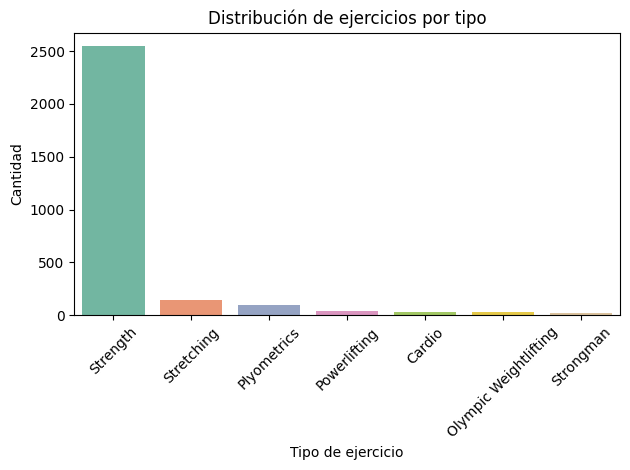

In [20]:
plt.figure()
sns.countplot(data=gym, x="Type", order=gym["Type"].value_counts().index, palette="Set2")
plt.title("Distribución de ejercicios por tipo")
plt.xlabel("Tipo de ejercicio")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribución por nivel (Level)
 Predominan ejercicios intermedios, lo que indica una base sólida para recomendaciones equilibradas.

 Los niveles "beginner" y "expert" están presentes pero en menor cantidad.

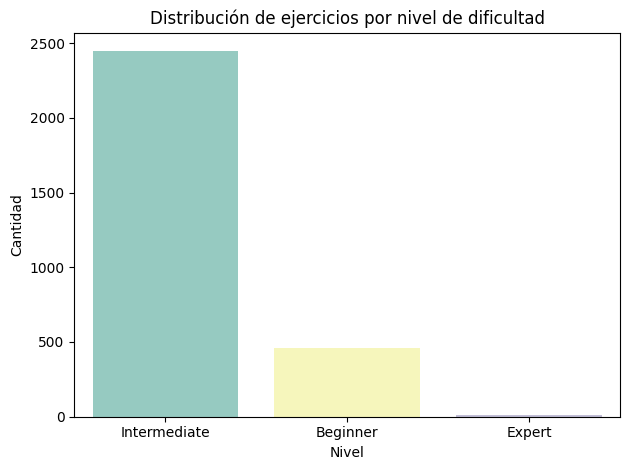

In [21]:
plt.figure()
sns.countplot(data=gym, x="Level", order=gym["Level"].value_counts().index, palette="Set3")
plt.title("Distribución de ejercicios por nivel de dificultad")
plt.xlabel("Nivel")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 3. Distribución por equipamiento (Equipment)
 Gran variedad de equipos, pero destacan ejercicios con Bodyweight, Dumbbells y Machines.

 Esto permite filtrar por disponibilidad real de cada usuario.

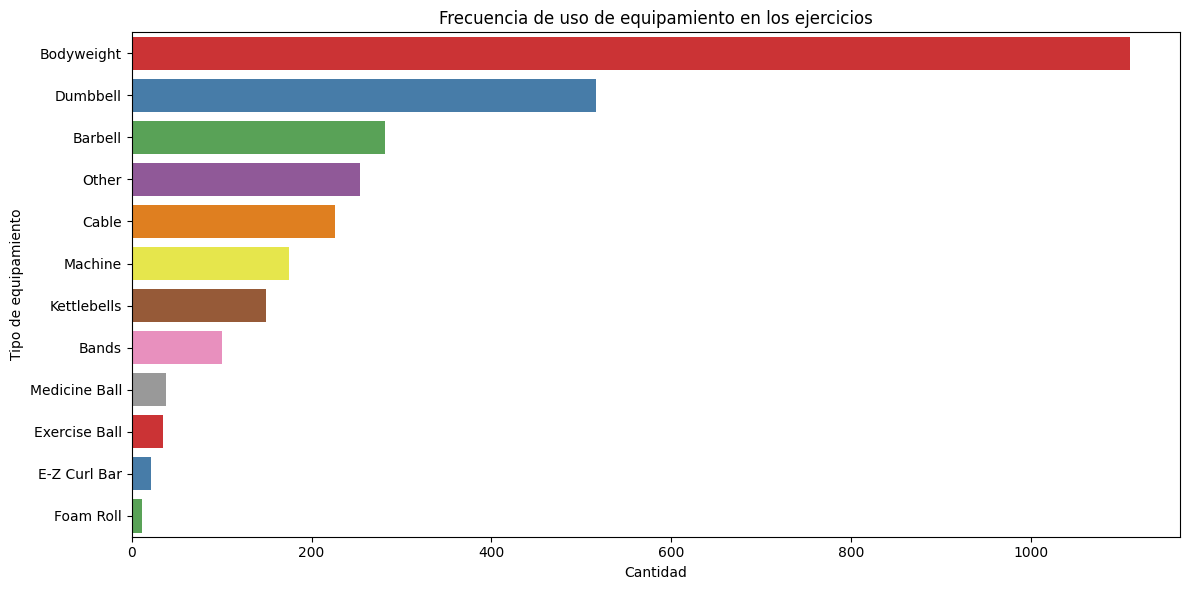

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gym, y="Equipment", order=gym["Equipment"].value_counts().index, palette="Set1")
plt.title("Frecuencia de uso de equipamiento en los ejercicios")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de equipamiento")
plt.tight_layout()
plt.show()

# 4. Distribución por grupo muscular (BodyGroup)
 Distribución bastante equilibrada entre Upper Body, Legs, Core y Back.

 Esto facilita la construcción de rutinas semanales completas y variadas.

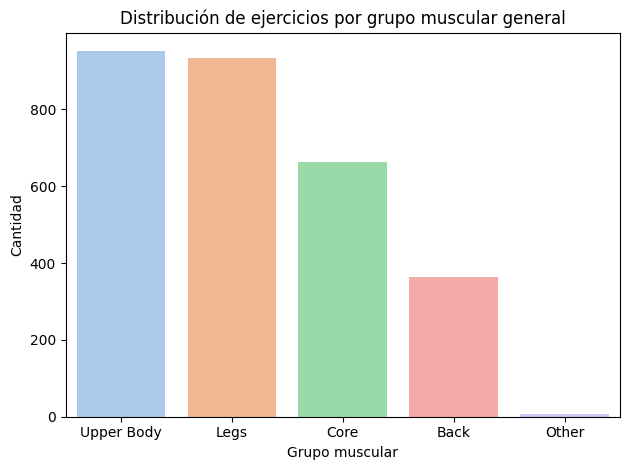

In [23]:
plt.figure()
sns.countplot(data=gym, x="BodyGroup", order=gym["BodyGroup"].value_counts().index, palette="pastel")
plt.title("Distribución de ejercicios por grupo muscular general")
plt.xlabel("Grupo muscular")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 5. Cruce: Tipo de ejercicio vs Nivel
 Los ejercicios de fuerza abarcan todos los niveles, lo que es útil para recomendaciones progresivas.

 Powerlifting y Olympic Weightlifting están casi exclusivamente en niveles avanzados.

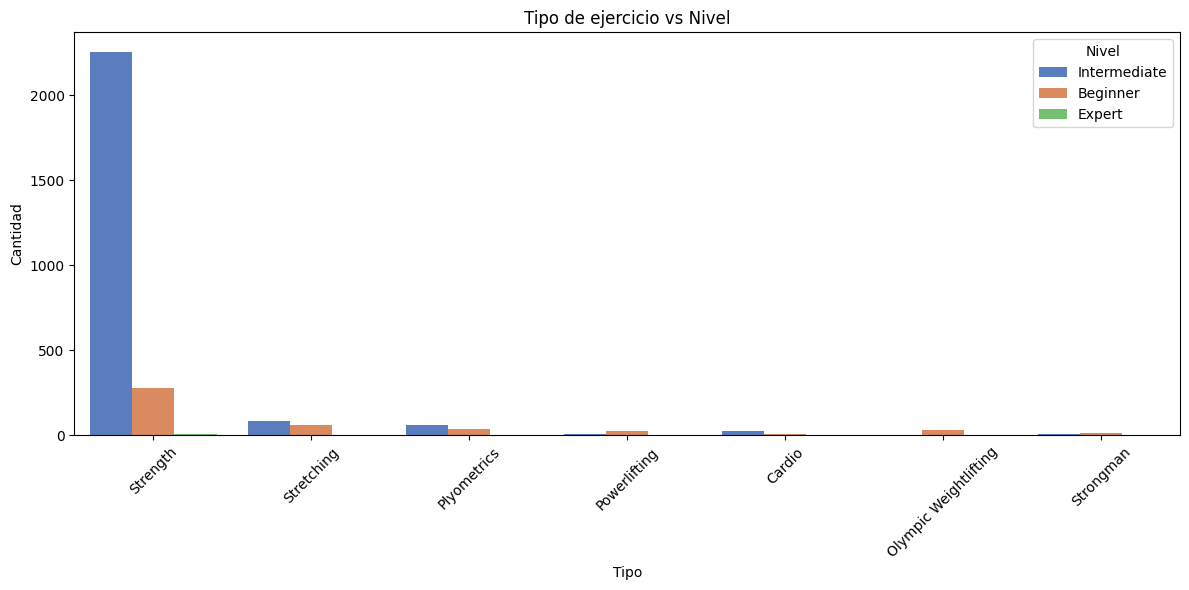

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gym, x="Type", hue="Level", order=gym["Type"].value_counts().index, palette="muted")
plt.title("Tipo de ejercicio vs Nivel")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Nivel")
plt.tight_layout()
plt.show()

# 6. Cruce: Tipo de ejercicio vs Equipamiento
 El equipamiento varía mucho según el tipo de ejercicio.

 Strength y Strongman usan más barras y pesas, mientras que cardio y pliometría dependen menos del equipo. 

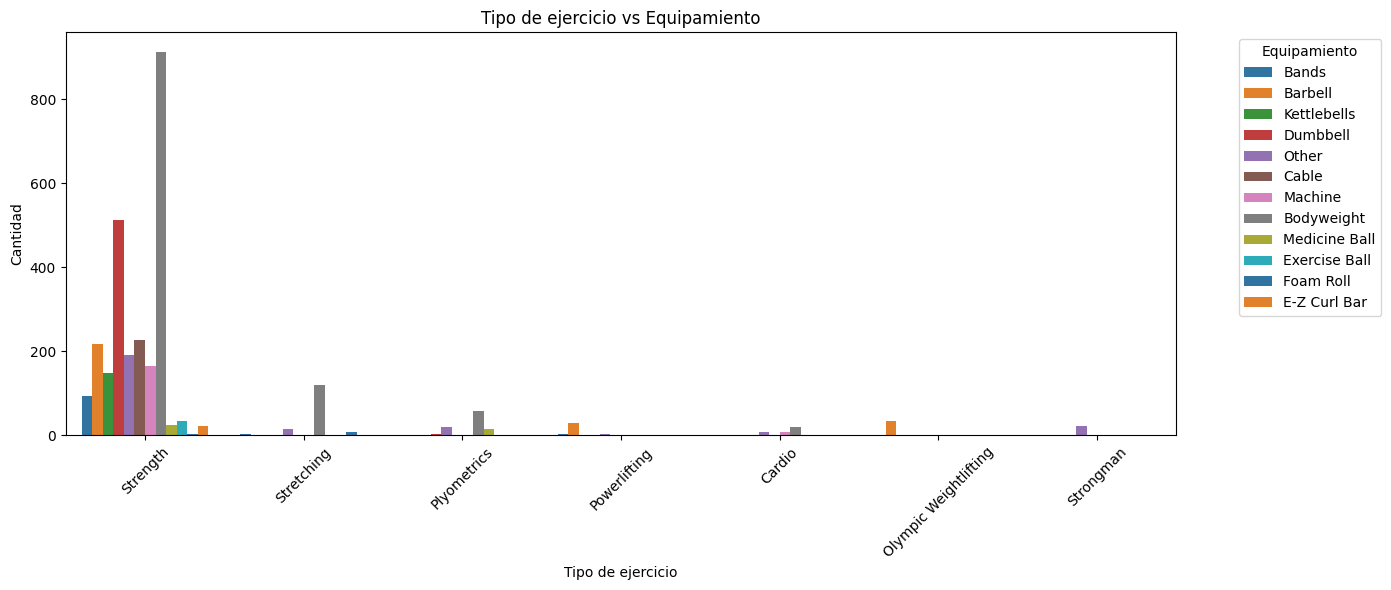

In [25]:
plt.figure(figsize=(14, 6))
sns.countplot(data=gym, x="Type", hue="Equipment", order=gym["Type"].value_counts().index, palette="tab10")
plt.title("Tipo de ejercicio vs Equipamiento")
plt.xlabel("Tipo de ejercicio")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Equipamiento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Cruce: Nivel vs Grupo Muscular
 Los grupos musculares como Core y Upper Body están bien representados en todos los niveles.

 Las piernas tienen más ejercicios intermedios y avanzados, posiblemente por su complejidad.

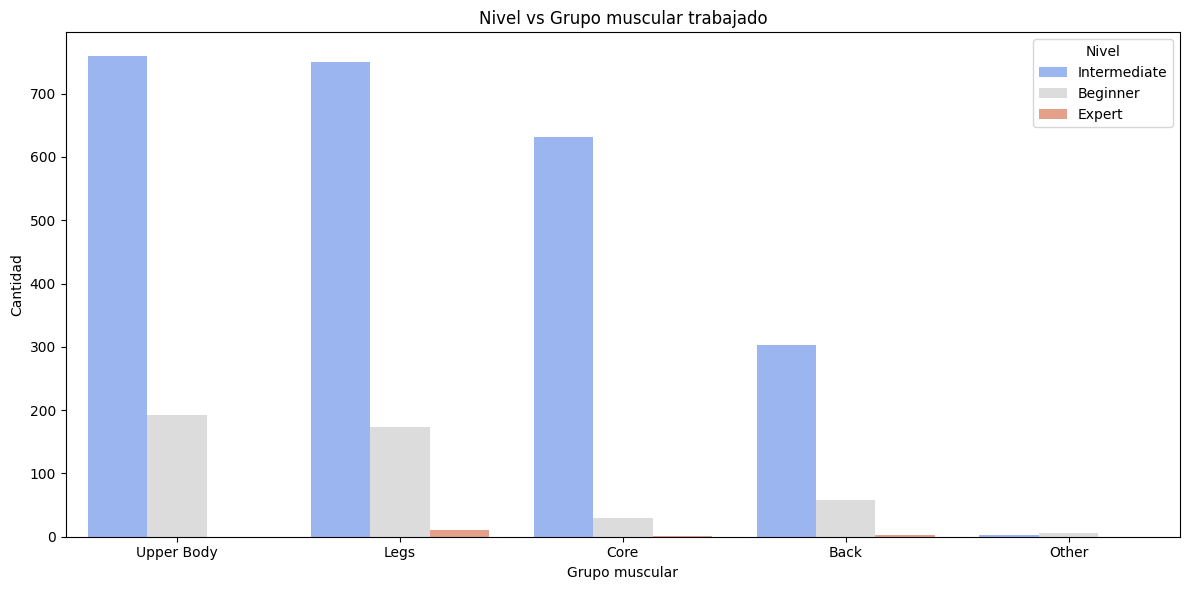

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gym, x="BodyGroup", hue="Level", order=gym["BodyGroup"].value_counts().index, palette="coolwarm")
plt.title("Nivel vs Grupo muscular trabajado")
plt.xlabel("Grupo muscular")
plt.ylabel("Cantidad")
plt.legend(title="Nivel")
plt.tight_layout()
plt.show()

# 8. Proporción de ejercicios por tipo (gráfico de pastel)
 Visualiza de forma clara el predominio absoluto del Strength, mientras que el resto ocupa una porción muy pequeña.

 Útil para balancear el sistema de recomendaciones si buscas más variedad.

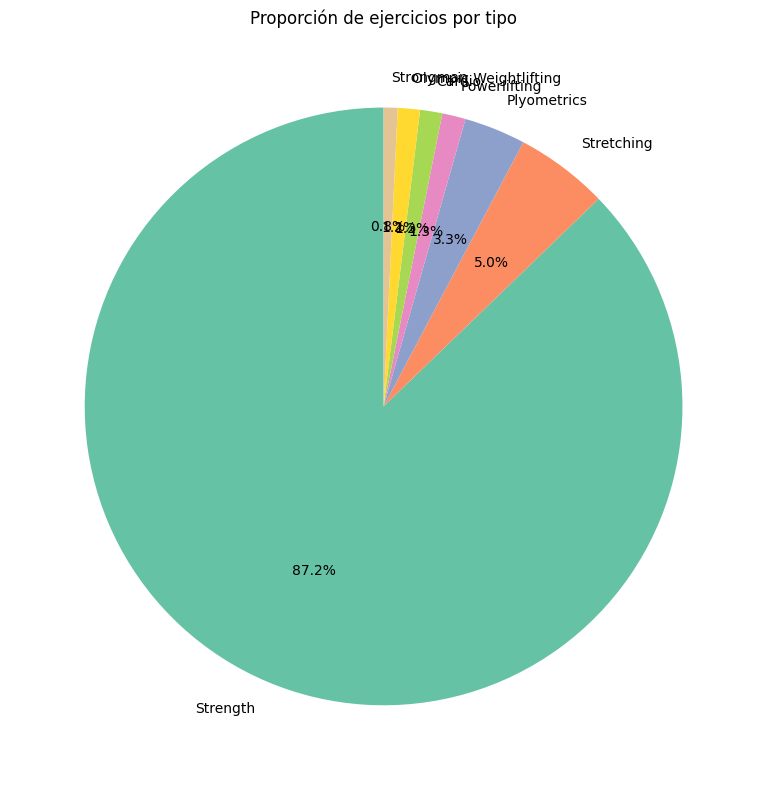

In [27]:
plt.figure(figsize=(8, 8))
gym['Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title("Proporción de ejercicios por tipo")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 9. Distribución de ejercicios por número de ejercicios por BodyPart (gráfico de barras horizontales)
 Abdominals y Quadriceps lideran por cantidad de ejercicios disponibles.

 Hay partes menos cubiertas como cuello, abductores y aductores → podrías destacar esto como una posible limitación.

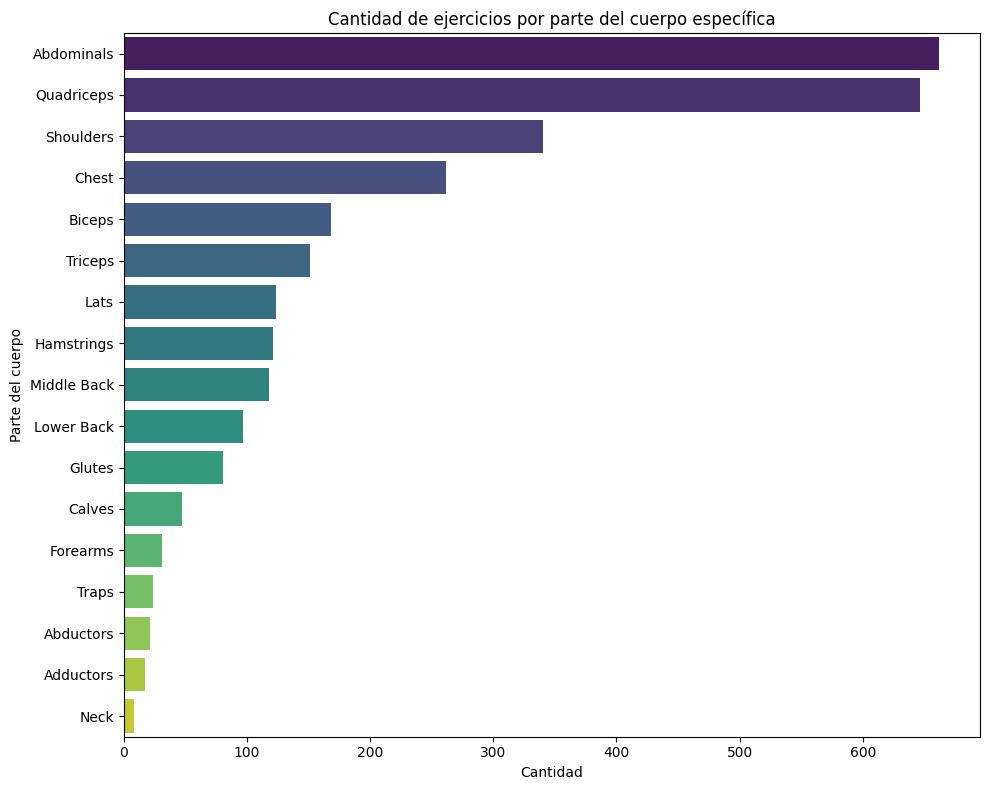

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(y=gym['BodyPart'].value_counts().index,
            x=gym['BodyPart'].value_counts().values,
            palette="viridis")
plt.title("Cantidad de ejercicios por parte del cuerpo específica")
plt.xlabel("Cantidad")
plt.ylabel("Parte del cuerpo")
plt.tight_layout()
plt.show()

# 10. Heatmap de relación entre Type y Level
 Permite detectar qué tipos tienen más variedad de niveles (e.g., Strength abarca todos).

 Otras categorías como Olympic Weightlifting están fuertemente ligadas al nivel avanzado.

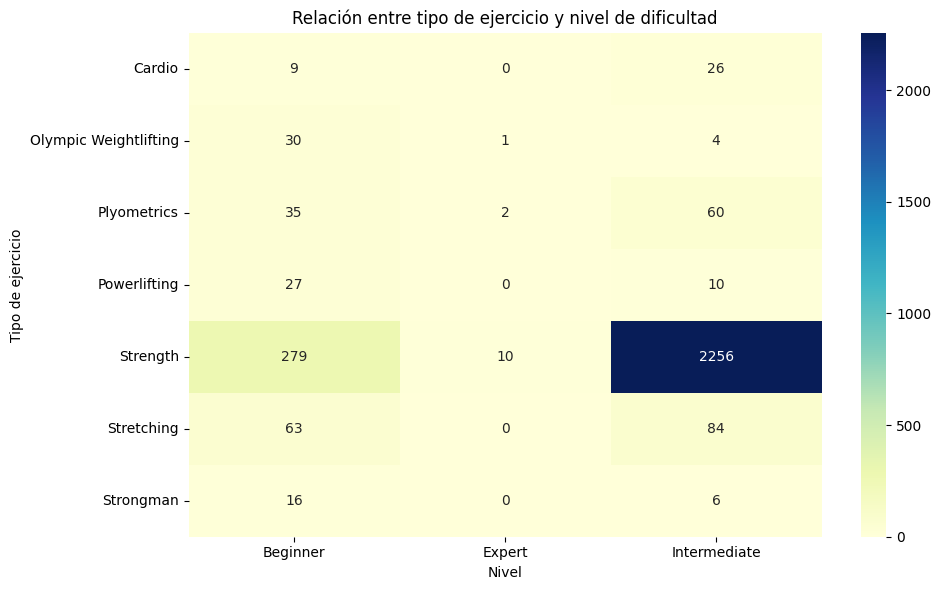

In [29]:
pivot_type_level = gym.pivot_table(index='Type', columns='Level', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_type_level, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Relación entre tipo de ejercicio y nivel de dificultad")
plt.xlabel("Nivel")
plt.ylabel("Tipo de ejercicio")
plt.tight_layout()
plt.show()

# 11. Heatmap entre BodyGroup y Equipment
 Excelente para ver qué grupo muscular se entrena con qué equipo.

 Por ejemplo, se ve que:

 Upper Body usa mucho Dumbbell, Barbell y Cable

 Legs con Bodyweight, Barbell, Machine

 Core está asociado a Bodyweight y Bands

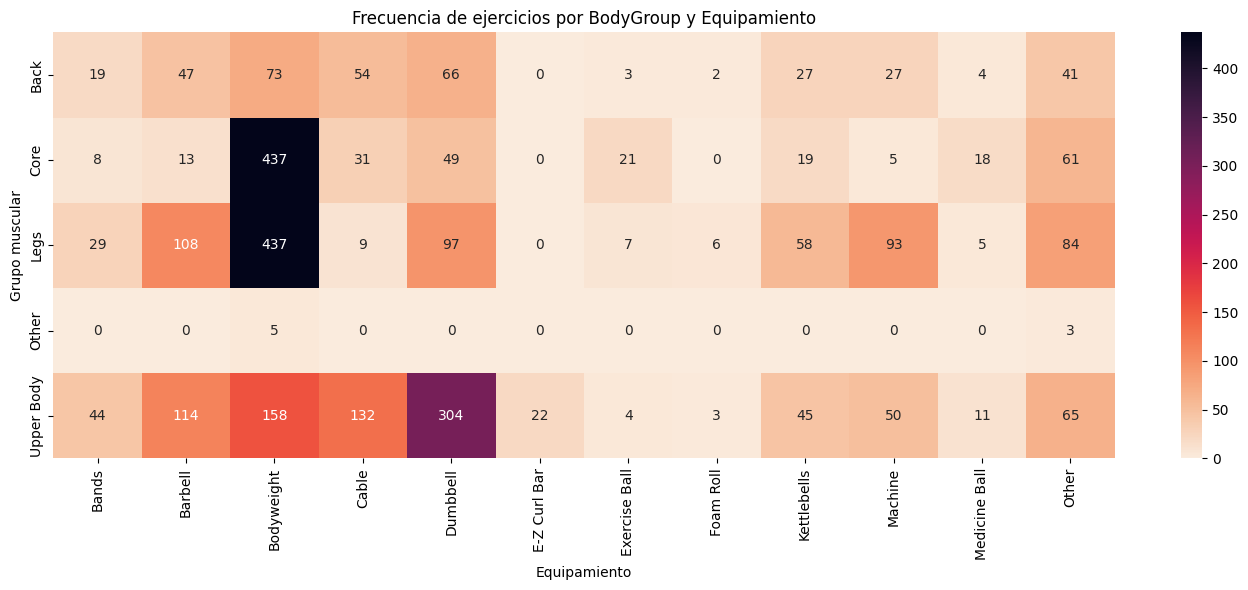

In [30]:
pivot_bodygroup_equipment = gym.pivot_table(index='BodyGroup', columns='Equipment', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_bodygroup_equipment, annot=True, fmt='d', cmap='rocket_r')
plt.title("Frecuencia de ejercicios por BodyGroup y Equipamiento")
plt.xlabel("Equipamiento")
plt.ylabel("Grupo muscular")
plt.tight_layout()
plt.show()

In [31]:
path_gym = "C:/Users/josen/Documents/MASTER/TFM/Datasets/gym.csv"
gym.to_csv(path_gym, index=False)